# Face detection

Available models for face detection (bounding box) : 

OpenCV Haarcascades	Heuristic detection (Haar)  
MTCNN	CNN-based detection	   
Dlib (HOG + SVM)	Detection using HOG + SVM	   
Dlib (CNN Face Detector)	CNN-based detection (ResNet-like)  
YOLO-Face	Fast detection (YOLO optimized for faces)	   
RetinaFace	High-precision detection (ResNet-based)  
BlazeFace (Google)	Mobile-optimized detection	  
FAN (Face Alignment Network)	Detection + landmarks	  
SCRFD	Fast and efficient detection (optimized for CPU/GPU)  

# Haar

# test 1 photo

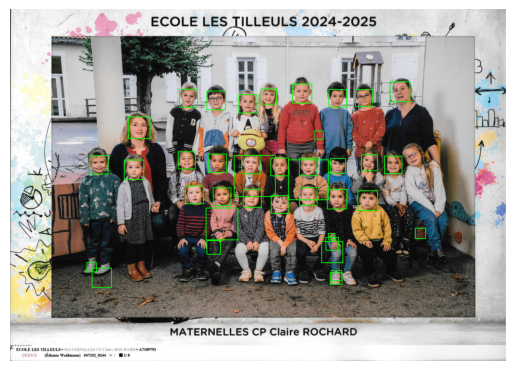

In [1]:
import cv2
import matplotlib.pyplot as plt

def detect_face_haar(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    # Affichage avec Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")  # Pas d'axes
    plt.show()

# Utilisation
image_path = '../raw_data/photo_test_set/etienne_photo_classe_001_PS.jpg'  # Remplace par le chemin de ton image
detect_face_haar(image_path)


# Traiter et sauvegarder une image

Visage 1 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_1.jpg
Visage 2 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_2.jpg
Visage 3 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_3.jpg
Visage 4 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_4.jpg
Visage 5 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_5.jpg
Visage 6 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_6.jpg
Visage 7 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_7.jpg
Visage 8 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_8.jpg
Visage 9 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_9.jpg
Visage 10 sauvegardé : ../processed_data/photo_test_set/etienne_photo_classe_001_PS_face_10.jpg
Visage 11 sauvegardé : ../processed_data/photo_test_set/et

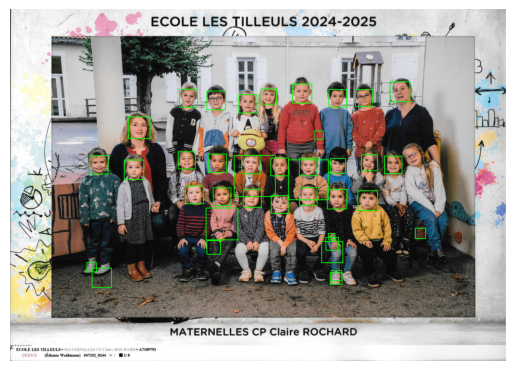

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

def detect_and_save_faces(image_path):
    # Récupérer le nom de base du fichier sans extension
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Charger le classificateur de visages pré-entraîné d'OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Charger l'image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Détecter les visages
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
 
    # Créer le dossier de sortie s'il n'existe pas
    output_folder="../processed_data/photo_test_set"
    os.makedirs(output_folder, exist_ok=True)

    # Sauvegarder les visages croppés et ajouter les bounding boxes
    for i, (x, y, w, h) in enumerate(faces, start=1):
        face_crop = image[y:y+h, x:x+w]  # Extraire le visage
        face_filename = os.path.join(output_folder, f"{base_filename}_face_{i}.jpg")
        cv2.imwrite(face_filename, face_crop)  # Sauvegarder l'image du visage
        print(f"Visage {i} sauvegardé : {face_filename}")

        # Dessiner un rectangle autour du visage détecté
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Sauvegarder l'image avec les bounding boxes
    output_image_path = os.path.join(output_folder, f"{base_filename}_detected.jpg")
    cv2.imwrite(output_image_path, image)
    print(f"Image avec détection sauvegardée : {output_image_path}")

    # Affichage avec Matplotlib (utile pour Jupyter Notebook)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")  # Pas d'axes
    plt.show()

# Utilisation
image_path = "../raw_data/photo_test_set/etienne_photo_classe_001_PS.jpg"  # Remplace par ton image
detect_and_save_faces(image_path)


# Traiter tout le dossier

🔍 Détection des visages dans 5 images...

✅ Visage 1 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924_face_1.jpg
✅ Visage 2 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924_face_2.jpg
📸 Image annotée sauvegardée : ../processed_data/../raw_data/painting_test_set/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924/marie-laurencin_portrait-of-baroness-gourgaud-in-black-mantilla-1924_detected.jpg



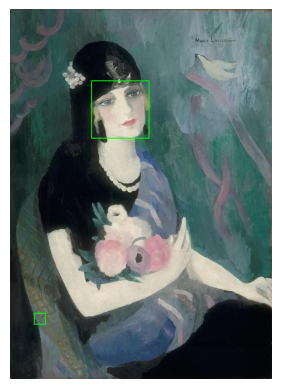

✅ Visage 1 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_face_1.jpg
✅ Visage 2 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_face_2.jpg
✅ Visage 3 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_face_3.jpg
✅ Visage 4 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_face_4.jpg
✅ Visage 5 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_face_5.jpg
📸 Image annotée sauvegardée : ../processed_data/../raw_data/painting_test_set/egon-schiele_the-family-1918/egon-schiele_the-family-1918_detected.jpg



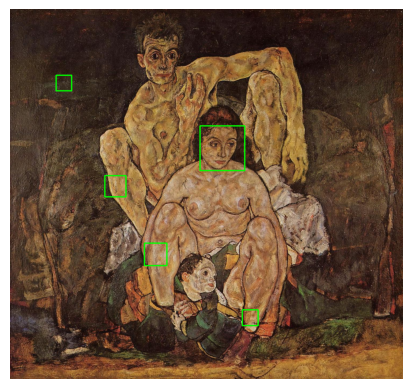

✅ Visage 1 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912_face_1.jpg
✅ Visage 2 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912_face_2.jpg
📸 Image annotée sauvegardée : ../processed_data/../raw_data/painting_test_set/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912/egon-schiele_self-portrait-with-chinese-lantern-fruits-1912_detected.jpg



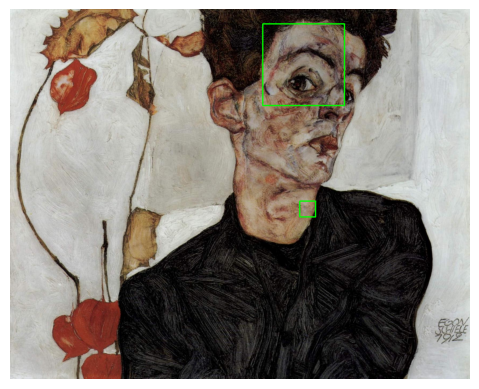

✅ Visage 1 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_face_1.jpg
✅ Visage 2 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_face_2.jpg
✅ Visage 3 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_face_3.jpg
✅ Visage 4 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_face_4.jpg
✅ Visage 5 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_face_5.jpg
📸 Image annotée sauvegardée : ../processed_data/../raw_data/painting_test_set/paul-cezanne_the-card-players-1896/paul-cezanne_the-card-players-1896_detected.jpg



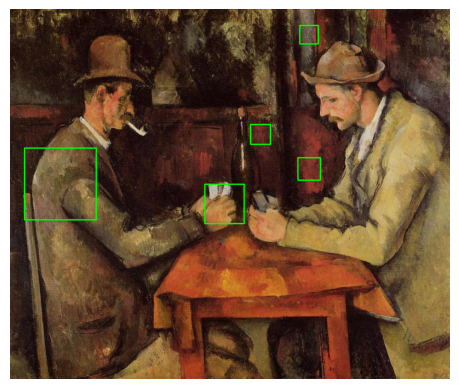

✅ Visage 1 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/vincent-van-gogh_the-potato-eaters-1885/vincent-van-gogh_the-potato-eaters-1885_face_1.jpg
✅ Visage 2 détecté et sauvegardé : ../processed_data/../raw_data/painting_test_set/vincent-van-gogh_the-potato-eaters-1885/vincent-van-gogh_the-potato-eaters-1885_face_2.jpg
📸 Image annotée sauvegardée : ../processed_data/../raw_data/painting_test_set/vincent-van-gogh_the-potato-eaters-1885/vincent-van-gogh_the-potato-eaters-1885_detected.jpg



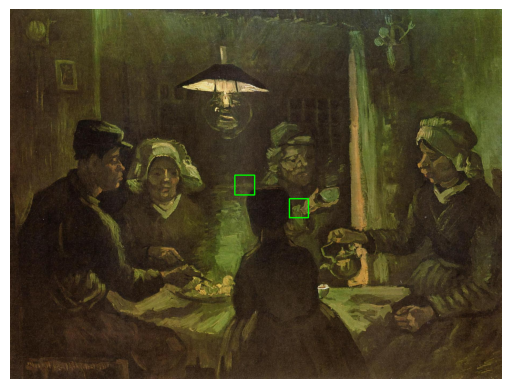

🎉 Traitement terminé pour toutes les images !


In [10]:
import cv2
import os
import matplotlib.pyplot as plt

def detect_and_save_faces_from_folder(input_folder, output_folder="output_faces"):
    # Charger le classificateur de visages pré-entraîné
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Vérifier si le dossier d'entrée existe
    if not os.path.exists(input_folder):
        print(f"❌ Le dossier '{input_folder}' n'existe pas.")
        return

    # Créer le dossier de sortie s'il n'existe pas
    output_folder=f"../processed_data/{input_folder}"
    os.makedirs(output_folder, exist_ok=True)

    # Liste des fichiers image dans le dossier
    image_extensions = (".jpg", ".jpeg", ".png")
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

    if not image_files:
        print(f"❌ Aucun fichier image trouvé dans '{input_folder}'.")
        return

    print(f"🔍 Détection des visages dans {len(image_files)} images...\n")

    for image_name in image_files:
        image_path = os.path.join(input_folder, image_name)
        base_filename = os.path.splitext(image_name)[0]

        # Charger l'image
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Détecter les visages
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Créer un sous-dossier pour chaque image traitée
        image_output_folder = os.path.join(output_folder, base_filename)
        os.makedirs(image_output_folder, exist_ok=True)

        # Sauvegarder les visages croppés et ajouter les bounding boxes
        for i, (x, y, w, h) in enumerate(faces, start=1):
            face_crop = image[y:y+h, x:x+w]  # Extraire le visage
            face_filename = os.path.join(image_output_folder, f"{base_filename}_face_{i}.jpg")
            cv2.imwrite(face_filename, face_crop)  # Sauvegarder l'image du visage
            print(f"✅ Visage {i} détecté et sauvegardé : {face_filename}")

            # Dessiner un rectangle autour du visage détecté
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Sauvegarder l'image avec les bounding boxes
        output_image_path = os.path.join(image_output_folder, f"{base_filename}_detected.jpg")
        cv2.imwrite(output_image_path, image)
        print(f"📸 Image annotée sauvegardée : {output_image_path}\n")

        # Affichage avec Matplotlib (bug dans Jupyter Notebook pour kill le process avec cv2.imshow())
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis("off")  
        plt.show()

    print("🎉 Traitement terminé pour toutes les images !")

# Traitement
input_folder = "../raw_data/painting_test_set/"  # Dossier contenant les images à scanner
detect_and_save_faces_from_folder(input_folder)


# Dlib

In [9]:
#a debugger 

import cv2
import dlib

def detect_face_dlib(image_path):
    detector = dlib.get_frontal_face_detector()
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError("L'image n'a pas pu être chargée. Vérifie le chemin du fichier.")

    # Convertir en RGB (dlib attend du RGB, pas du BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Détecter les visages
    faces = detector(image_rgb)

    # Dessiner des bounding boxes
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Afficher l'image avec les visages détectés
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Lancer la détection
detect_face_dlib('../raw_data/photo_test_set/etienne.jpg')


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

## test 1 photo